In [1]:
# Add the dependencies.
import pandas as pd
import os
from sqlalchemy import create_engine, func
from config import DATABASE_URI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from tensorflow.keras import metrics
#from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import sqlalchemy
#get data from postgres
#combined the multiple data sets from three different runs into one in postgres using SQL
engine = create_engine(DATABASE_URI)
CS_df = pd.read_sql_table(
    'combec',
    con=engine
)
CS_df.head()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1
0,C2,17,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
1,C2,123,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
2,C2,232,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
3,C2,346,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0
4,C2,454,0.0645,100.0,100.0,55.0,False,400.0,0.0,0.0,0.0,85.0,10.0,1.54 - 9.28j,0.0


In [3]:
temp1_df = CS_df[CS_df['o_o'] == True]
temp1_df['pw1_Diff'] = temp1_df['pw1'].diff()
temp1_df['index1'] = temp1_df.index
temp1_df.head()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
67,C2,7343,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,NaN,67
68,C2,7452,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,68
69,C2,7565,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,69
70,C2,7674,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,70
71,C2,7780,0.0645,100.0,100.0,55.0,True,0.0,0.0,85.0,10.0,85.0,10.0,1.54 - 9.28j,0.0,0.0,71


In [4]:
temp2_df = temp1_df[(temp1_df['pw1'] > 0) & \
                    ((temp1_df['re'] > temp1_df['pw1']*0.02 )|(temp1_df['re'] == 0)) & (temp1_df['pr1'] > 0.017)]
temp2_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
99569,C4,3129286,0.0189,25.1,60.2,55.0,True,800.0,201.032,85.0,10.0,29.3,32.1,9.11 - 66.1j,418.8,0.0,99569
99570,C4,3129396,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,9.11 - 66.1j,418.8,0.0,99570
99571,C4,3129506,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99571
99572,C4,3129618,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99572
99573,C4,3129725,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,62.9,23.9,3.64 - 63.8j,980.0,0.0,99573


In [5]:
temp2_df['index1_Diff'] = temp2_df['index1'] - temp2_df['index1'].shift(-1)
temp2_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
99569,C4,3129286,0.0189,25.1,60.2,55.0,True,800.0,201.032,85.0,10.0,29.3,32.1,9.11 - 66.1j,418.8,0.0,99569,-1.0
99570,C4,3129396,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,9.11 - 66.1j,418.8,0.0,99570,-1.0
99571,C4,3129506,0.0189,25.1,60.2,55.0,True,800.0,166.332,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99571,-1.0
99572,C4,3129618,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,51.7,25.5,3.64 - 63.8j,980.0,0.0,99572,-1.0
99573,C4,3129725,0.0189,25.1,60.2,55.0,True,800.0,51.552,85.0,10.0,62.9,23.9,3.64 - 63.8j,980.0,0.0,99573,NaN


In [6]:
temp3_df = temp2_df[((temp2_df['pw1_Diff'] > 0) & (temp2_df['index1_Diff'] == -1))|(temp2_df['index1_Diff'] <-4) ]
temp3_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
99369,C4,3107411,0.0189,25.0,60.0,55.0,True,800.0,200.756,65.0,20.0,65.0,20.0,2.75 - 51.0j,131.39,800.0,99369,-1.0
99383,C4,3108948,0.0190,25.0,60.0,55.0,True,800.0,41.384,65.0,20.0,61.4,24.2,2.74 - 61.7j,1117.60,0.0,99383,-77.0
99460,C4,3117367,0.0189,25.0,60.0,55.0,True,800.0,200.484,75.0,15.0,74.3,15.1,2.05 - 34.7j,0.00,800.0,99460,-1.0
99477,C4,3119229,0.0190,25.0,60.0,55.0,True,800.0,55.220,75.0,15.0,59.9,23.9,3.10 - 61.7j,1036.40,0.0,99477,-75.0
99552,C4,3127428,0.0189,25.0,60.0,55.0,True,800.0,201.032,85.0,10.0,85.0,10.0,1.54 - 9.28j,131.39,800.0,99552,-1.0


In [7]:
temp3_df['time'] = temp3_df['t1'].diff()
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
99369,C4,3107411,0.0189,25.0,60.0,55.0,True,800.0,200.756,65.0,20.0,65.0,20.0,2.75 - 51.0j,131.39,800.0,99369,-1.0,9402.0
99383,C4,3108948,0.0190,25.0,60.0,55.0,True,800.0,41.384,65.0,20.0,61.4,24.2,2.74 - 61.7j,1117.60,0.0,99383,-77.0,1537.0
99460,C4,3117367,0.0189,25.0,60.0,55.0,True,800.0,200.484,75.0,15.0,74.3,15.1,2.05 - 34.7j,0.00,800.0,99460,-1.0,8419.0
99477,C4,3119229,0.0190,25.0,60.0,55.0,True,800.0,55.220,75.0,15.0,59.9,23.9,3.10 - 61.7j,1036.40,0.0,99477,-75.0,1862.0
99552,C4,3127428,0.0189,25.0,60.0,55.0,True,800.0,201.032,85.0,10.0,85.0,10.0,1.54 - 9.28j,131.39,800.0,99552,-1.0,8199.0


In [8]:
temp3_df.drop(temp3_df.tail(1).index,inplace=True) # drop last n rows
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
99283,C4,3098009,0.0189,25.0,60.0,55.0,True,800.0,22.672,55.0,25.0,63.3,23.9,2.63 - 61.7j,1129.19,0.0,99283,-86.0,766.0
99369,C4,3107411,0.0189,25.0,60.0,55.0,True,800.0,200.756,65.0,20.0,65.0,20.0,2.75 - 51.0j,131.39,800.0,99369,-1.0,9402.0
99383,C4,3108948,0.0190,25.0,60.0,55.0,True,800.0,41.384,65.0,20.0,61.4,24.2,2.74 - 61.7j,1117.60,0.0,99383,-77.0,1537.0
99460,C4,3117367,0.0189,25.0,60.0,55.0,True,800.0,200.484,75.0,15.0,74.3,15.1,2.05 - 34.7j,0.00,800.0,99460,-1.0,8419.0
99477,C4,3119229,0.0190,25.0,60.0,55.0,True,800.0,55.220,75.0,15.0,59.9,23.9,3.10 - 61.7j,1036.40,0.0,99477,-75.0,1862.0


In [9]:
temp4_df = temp3_df[(temp3_df['index1_Diff'] < -1 ) & (temp3_df['pw1_Diff'] ==0 )]
temp4_df.head()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
215,C2,23529,0.0643,100.0,100.0,55.0,True,100.0,4.060,85.0,10.0,58.2,20.7,5.65 - 53.4j,124.6,0.0,215,-79.0,1088.0
302,C2,33270,0.0644,100.0,100.0,55.0,True,100.0,3.396,75.0,15.0,59.9,20.4,2.87 - 51.5j,125.6,0.0,302,-83.0,875.0
487,C2,53501,0.0641,100.0,100.0,55.0,True,100.0,5.204,55.0,25.0,66.8,20.2,2.53 - 51.6j,123.4,0.0,487,-81.0,1092.0
579,C2,63565,0.0646,100.0,100.0,55.0,True,100.0,7.220,45.0,30.0,48.6,21.1,4.20 - 51.3j,129.2,0.0,579,-81.0,1205.0
671,C2,73624,0.0647,100.0,100.0,55.0,True,100.0,2.724,35.0,35.0,71.8,19.8,2.31 - 51.8j,123.2,0.0,671,-80.0,1200.0


In [10]:
temp4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 215 to 99477
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idd          835 non-null    object 
 1   t1           835 non-null    int64  
 2   pr1          835 non-null    float64
 3   f1           835 non-null    float64
 4   f2           835 non-null    float64
 5   f3           835 non-null    float64
 6   o_o          835 non-null    bool   
 7   pw1          835 non-null    float64
 8   re           835 non-null    float64
 9   x1           835 non-null    float64
 10  x2           835 non-null    float64
 11  x1r          835 non-null    float64
 12  x2r          835 non-null    float64
 13  z            835 non-null    object 
 14  a1           835 non-null    float64
 15  pw1_Diff     835 non-null    float64
 16  index1       835 non-null    int64  
 17  index1_Diff  835 non-null    float64
 18  time         835 non-null    float64
dtypes: b

In [11]:
columnx = ['f1','f2','f3','pw1','time']
columny = ['x1','x2']

In [12]:
X = temp4_df[columnx].values
y = temp4_df[columny].values
for i in range(len(y)):
    y[i] =[y[i][0]/100,y[i][1]/100]

In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
len(X_test)


209

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10

n1 = tf.keras.models.Sequential()

# First hidden layer
n1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
n1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
n1.add(tf.keras.layers.Dense(units=2))

# Check the structure of the model
n1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
n1.compile(loss='mse', optimizer="adam",metrics=["mse"])
# Train the model
fit_model = n1.fit(X_train_scaled,y_train,batch_size= 50,epochs=30)

# Evaluate the model using the test data
model_loss, model_accuracy = n1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, accuracy: {1-model_accuracy}")

Epoch 1/30
13/13 [==============================] - 0s 2ms/step - loss: 0.5394 - mse: 0.5394
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: 0.3521 - mse: 0.3521
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 0.2426 - mse: 0.2426
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 0.1750 - mse: 0.1750
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 0.1309 - mse: 0.1309
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.1007 - mse: 0.1007
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0791 - mse: 0.0791
Epoch 8/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0629 - mse: 0.0629
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 0.0513 - mse: 0.0513
Epoch 10/30
13/13 [==============================] - 0s 1ms/step - loss: 0.0435 - mse: 0.0435
Epoch 11/30
13/13 [==============================] - 0s 2ms/step - lo

In [18]:
X_scaled = X_scaler.transform(X)

In [19]:
output = n1.predict(X_scaled)

In [20]:
temp4_df["P1"] = [i[0]*100 for i in output]
temp4_df["P2"] = [i[1]*100 for i in output]
result_df = temp4_df[['x1','x2','P1','P2']]
result_df.head(30)

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x1,x2,P1,P2
215,85.0,10.0,62.657058,17.060921
302,75.0,15.0,56.736934,16.066435
487,55.0,25.0,62.776798,17.077416
579,45.0,30.0,68.583828,18.954864
671,35.0,35.0,68.314302,18.864468
759,25.0,40.0,56.921983,16.128117
851,35.0,35.0,59.663421,16.648456
945,45.0,30.0,68.314302,18.864468
1035,55.0,25.0,62.855935,17.115027
1218,75.0,15.0,59.453863,16.619584


In [21]:
#save model
n1.save("oct10.h5")

In [22]:
# Import the model to a new object
n1_imported = tf.keras.models.load_model('oct10.h5')

In [23]:
output1 = n1_imported.predict(X_scaled)

In [24]:
temp4_df["P11"] = [i[0]*100 for i in output1]
temp4_df["P22"] = [i[1]*100 for i in output1]
result_df = temp4_df[['x1','x2','P11','P22']]
result_df.head(30)

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x1,x2,P11,P22
215,85.0,10.0,62.657058,17.060921
302,75.0,15.0,56.736934,16.066435
487,55.0,25.0,62.776798,17.077416
579,45.0,30.0,68.583828,18.954864
671,35.0,35.0,68.314302,18.864468
759,25.0,40.0,56.921983,16.128117
851,35.0,35.0,59.663421,16.648456
945,45.0,30.0,68.314302,18.864468
1035,55.0,25.0,62.855935,17.115027
1218,75.0,15.0,59.453863,16.619584


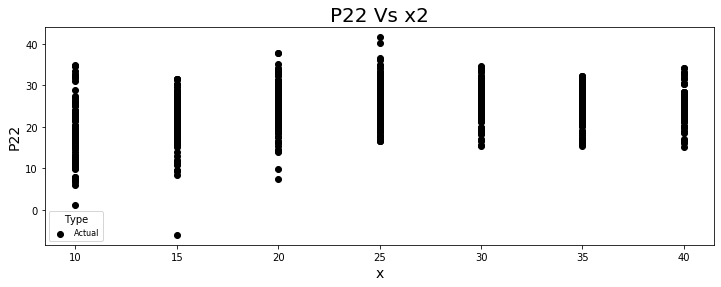

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(result_df["x2"],y=result_df["P22"],color='black',label='Actual')

ax.set_title('P22 Vs x2',fontsize=20)
ax.set_ylabel('P22',fontsize=14)
ax.set_xlabel('x',fontsize=14)
ax.legend(loc="lower left",title="Type",fontsize="8")
def onclick(event):
    print( 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
        event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [32]:
test_df = pd.read_csv("test.csv")
test_df

,f1,f2,f3,pw1,time
0,50,50,50,100,1000
1,70,70,70,100,1000
2,80,80,80,100,1000
3,50,50,50,200,1000
4,70,70,70,200,1000
5,80,80,80,200,1000
6,50,50,50,300,1000
7,70,70,70,300,1000
8,80,80,80,300,1000
9,50,50,50,400,1000


In [33]:
test_df.columns

Index(['f1', 'f2', 'f3', 'pw1', 'time'], dtype='object')

In [34]:
Xt = test_df[columnx].values
X_test_scaled = X_scaler.transform(Xt)

In [35]:
test_output = n1.predict(X_test_scaled)

In [40]:
for i in range(len(test_output)):
    if test_output[i][0] > 0.9 :
        test_output[i][0] = 0.85
    if test_output[i][1] < 0.1 :
        test_output[i][1] = 0.1    
        

In [41]:
test_df["P11"] = [i[0]*100 for i in test_output]
test_df["P22"] = [i[1]*100 for i in test_output]
test_df 

,f1,f2,f3,pw1,time,P11,P22
0,50,50,50,100,1000,71.888840,46.623832
1,70,70,70,100,1000,29.456890,10.000000
2,80,80,80,100,1000,20.789826,10.000000
3,50,50,50,200,1000,65.162939,39.830303
4,70,70,70,200,1000,28.070486,10.000000
5,80,80,80,200,1000,20.697807,10.000000
6,50,50,50,300,1000,67.997223,41.019657
7,70,70,70,300,1000,29.258627,12.645042
8,80,80,80,300,1000,23.455489,10.000000
9,50,50,50,400,1000,64.979869,40.059358


In [42]:
test_df.to_csv("test_results.csv",header=True)